In [38]:
#import bibles
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras import Sequential, Model
from keras.utils import to_categorical
from keras.layers import Dense, Conv2DTranspose, LeakyReLU
from keras.layers import BatchNormalization, Dropout, Reshape, Input

(28, 28, 1)


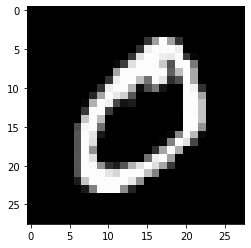

In [39]:
#load data
(y_train, x_train), (y_test,x_test) = mnist.load_data()

#nums to one-hot vector
x_train = to_categorical(x_train, 10)
x_test = to_categorical(x_test, 10)

#reshape y_x data
y_train = np.reshape(y_train, (len(y_train), 28, 28, 1))
y_test = np.reshape(y_test, (len(y_test), 28, 28, 1))

#print and show any data about mnist
print(y_train[1].shape)
plt.imshow(y_train[1], cmap='gray')

In [73]:
#model
model = Sequential([
  Input(shape=[10]),
  Dense(7 * 7 * 256, activation='relu'),
  BatchNormalization(),
  Reshape((7, 7, 256)),
  Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', activation='relu'),
  BatchNormalization(),
  Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', activation='relu'),
  BatchNormalization(),
  Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='sigmoid'),
])
model.summary()
model.compile(loss='mae', optimizer='adam', metrics=['acc']) #select loss (Mean Absolute Error (sum(|y_true-y_pred|))), optimizer - Adam

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 12544)             137984    
                                                                 
 batch_normalization_52 (Bat  (None, 12544)            50176     
 chNormalization)                                                
                                                                 
 reshape_19 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_74 (Conv2D  (None, 7, 7, 128)        819328    
 Transpose)                                                      
                                                                 
 batch_normalization_53 (Bat  (None, 7, 7, 128)        512       
 chNormalization)                                                
                                                     

In [74]:
history = model.fit(x_train, y_train, epochs=3) # fit on 3 epochs

Epoch 1/3
1875/1875 [==============================] - 97s 51ms/step - loss: 33.2477 - acc: 0.7473
Epoch 2/3
1875/1875 [==============================] - 97s 52ms/step - loss: 33.2435 - acc: 0.7542
Epoch 3/3
1875/1875 [==============================] - 98s 52ms/step - loss: 33.2432 - acc: 0.7556


In [89]:
plt.figure(figsize=(1,10))

for i in range(0,10):
    ax = plt.subplot(1,10,i+1)
    raw_data = i
    raw_to_onehot = to_categorical(i, 10)
    raw_prediction = model.predict(np.reshape(raw_to_onehot, (1, 10)))
    img = np.reshape(raw_prediction, (28,28,1))
    plt.imshow(img*255, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

1/1 [==============================] - 0s 11ms/step
